# Oil Field Decision Problem

This notebook delves into the decision-making process for an oil company evaluating the purchase of an oil field. We will leverage the following:
* [Decision trees](https://en.wikipedia.org/wiki/Decision_tree) (do not confuse with [classification trees](https://en.wikipedia.org/wiki/Decision_tree_learning)).
* [Influence diagrams](https://en.wikipedia.org/wiki/Influence_diagram).

#### Table of contents:

1. Framing the decision problem

2. Quantifying the decision problem

3. Modelling the decision problem with a decision tree

4. Modelling the decision problem with an influence diagram

5. Solving the influence diagram

## 1 - Framing the decision problem

An oil company is considering the <span style="color: red"><b>decision</b></span> (<span style="color: red"><b>B</b></span>) to buy an oil field. The oil field can have three quality levels (<span style="color: purple"><b>Q</b></span>): high ($q_1$), medium ($q_2$), and low ($q_3$). The company obviously does not know the "real" qaulity of the field beforehand, but it can provide an estimation (i.e., <span style="color: purple"><b>uncertainty</b></span> ) using historical data and imagery. **It is willing to pay a higher price for the field as its quality increases**.

Before making the buy decision, the company needs to <span style="color: red"><b>decide</b></span> (<span style="color: red"><b>T</b></span>) if it wants to perform a geological test. This test will have a certain cost and its results (<span style="color: purple"><b>R</b></span>) will not be exact predictions about the quality of the field, but will provide a report on the porosity of the reservoir (high porosity generally indicates greater oil potential). The test will not be infallible, and thus contain a certain degree of <span style="color: purple"><b>uncertainty</b></span>. The test can have two possible outcomes:

* **Pass:** The porosity of the reservoir rock is equal to or greater than 15%, indicating significant oil potential.
* **Fail:** The porosity of the reservoir rock is less than 15%, indicating low oil potential.

<table>
  <tr>
    <td>
      <img src="./images/rock_porosity.jpg" alt="Rock porosity examples" width="600">
    </td>
  </tr>
  <tr>
    <td align="center"><i><b>Figure 1.</b> Reservoir quality illustrated through porosity and permeability characteristics</i></td>
  </tr>
</table>

The chronological sequence of the decision process is as follows:

1. The company decides whether or not to perform the geological test.
2. If the test is performed, the results are observed.
3. The company decides whether or not to buy the oil field.

There is still residual uncertainty in the problem that affects utility: <span style="color: purple"><b>What is the actual state of the oil field?</b></span>

In this example, it seems logical for the company to buy the oil field after obtaining a "pass" result, but this is not always the case. It will depend on its specific a priori beliefs about the quality of the land (for example, based on its historical data on oil fields with similar characteristics), the intrinsic uncertainty of the test (for example, the test may give a positive result but the field is not actually suitable, or vice versa) and how the company values the possible consequences.

## 2 - Quantifying the decision problem

In this case, the quantitative information will be specified explicitly to illustrate these ideas. 

### 2.1 - The utility table (<span style="color: blue">U</span>)

To evaluate the decision tree for the oil field, we need to define the value (utility) of each outcome. 

* <span style="color: red">T</span>: Perform the test, skip the test, or take no action.
* <span style="color: red">B</span>: Buy the oil field.
* <span style="color: purple">Q</span>: Oil field quality.
* <span style="color: blue">U</span>: Utility of the decision outcome.

<table>
  <tr>
    <th><span style="color: red">T</span></th>
    <th><span style="color: red">B</span></th>
    <th><span style="color: purple">Q</span></th>
    <th><span style="color: blue">U</span></th>
  </tr>
  <tr>
    <td rowspan="6">do</td>
    <td rowspan="3">buy</td>
    <td>high</td>
    <td>1250</td>
  </tr>
  <tr>
    <td>medium</td>
    <td>630</td>
  </tr>
  <tr>
    <td>low</td>
    <td>0</td>
  </tr>
  <tr>
    <td rowspan="3">not buy</td>
    <td>high</td>
    <td>350</td>
  </tr>
  <tr>
    <td>medium</td>
    <td>350</td>
  </tr>
  <tr>
    <td>low</td>
    <td>350</td>
  </tr>
  <tr>
    <td rowspan="6">not do</td>
    <td rowspan="3">buy</td>
    <td>high</td>
    <td>1280</td>
  </tr>
  <tr>
    <td>medium</td>
    <td>660</td>
  </tr>
  <tr>
    <td>low</td>
    <td>30</td>
  </tr>
  <tr>
    <td rowspan="3">not buy</td>
    <td>high</td>
    <td>380</td>
  </tr>
  <tr>
    <td>medium</td>
    <td>380</td>
  </tr>
  <tr>
    <td>low</td>
    <td>380</td>
  </tr>
</table>

### 2.2 - The prior probability distribution of oil field quality (<span style="color: purple">Q</span>)

This table shows the prior probability distribution of the oil field quality. These probabilities represent the company's belief on the oil field quality. 

<table>
  <tr>
    <th colspan="2">P(<span style="color: purple">Q</span>)</th>
  </tr>
  <tr>
    <td>high</td>
    <td>0.35</td>
  </tr>
  <tr>
    <td>medium</td>
    <td>0.45</td>
  </tr>
  <tr>
    <td>low</td>
    <td>0.2</td>
  </tr>
</table>

We can imagine these probabilities were estimated based on historical information from the oil company's past exploration of similar oil fields. For example, the company could have a classification model that predicts the oil field quality by using [satellite imagery and geographical location data](https://www.satimagingcorp.com/applications/energy/exploration/oil-exploration/).

<table>
  <tr>
    <td>
      <img src="./images/oil_field_image.jpg" alt="Oil field image" width="400">
    </td>
    <td>
      <img src="./images/oil_field_heatmap.jpg" alt="Oil field heatmap" width="400">
    </td>
  </tr>
  <tr>
    <td colspan="2" align="center">
      <i><b>Figure 2.</b> Satellite imagery and heatmap of the oil field</i>
    </td>
  </tr>
</table>

### 2.3 - The conditional probability distribution of the porosity test result (<span style="color: purple">R</span> | <span style="color: purple">Q</span>)

The results of the porosity test are directly related to the actual quality of the oil field (<span style="color: purple"><b>Q</b></span>). In a perfect scenario, the test would be highly accurate.

However, real-world tests are not perfect. The table below introduces these measurement imperfections by showing the conditional probability of each test result <span style="color: purple"><b>R</b></span> (pass or fail) given the actual quality of the oil field.

<table>
  <tr>
    <th>P(<span style="color: purple">R</span> | <span style="color: purple">Q</span>)</th>
    <th>high</th>
    <th>medium</th>
    <th>low</th>      
  </tr>
  <tr>
    <td>pass</td>
    <td>0.95</td>
    <td>0.7</td>
    <td>0.15</td>      
  </tr>
  <tr>
    <td>fail</td>
    <td>0.05</td>
    <td>0.3</td>
    <td>0.85</td> 
  </tr>
</table>

## 3 - Modelling the problem with a decision tree

<table>
<tr>
  <td>
    <img src="./images/oil_decision_tree.png" alt="Oil decision tree" width="500">
  </td>
</tr>
<tr>
  <td align="center"><i><b>Figure 3.</b> Oil decision tree </i></td>
</tr>
</table>

It is worth noting that any structural asymmetry is explicitly reflected in the decision tree. For example, the test results will only be obtained if the company decides to perform the test.

## 4 - Evaluating the decision tree to find the optimal policy

To determine the optimal policy in a decision tree, we evaluate each possible decision path. This involves two main steps:

1. **Estimating Probabilities** – using marginal and conditional probabilities.
2. **Calculating Expected Utilities** – by evaluating the outcomes of each decision.

The expected utility of a decision is computed by:
- Multiplying the utility (or payoff) of each outcome by its associated probability.
- Summing these products across all possible outcomes under that decision.

The decision with the **highest expected utility** at each decision node is the optimal choice.

---

### 4.1 - Compute expected utilities

#### ▶ Perform the test and the result is $R = $`pass`

1. We compute the **marginal probability** of obtaining a `pass` result:

$$
\begin{align*}
P(R = \text{pass}) &= P(R = \text{pass} | Q = \text{high}) \cdot P(Q = \text{high}) \\
&\quad + P(R = \text{pass} | Q = \text{medium}) \cdot P(Q = \text{medium}) \\
&\quad + P(R = \text{pass} | Q = \text{low}) \cdot P(Q = \text{low}) \\
&= 0.95 \times 0.35 + 0.7 \times 0.45 + 0.15 \times 0.20 = 0.3325 + 0.315 + 0.03 = 0.6775
\end{align*}
$$

2. We use **Bayes’ Theorem** to compute the posterior probabilities of $Q$ given that the test result is a `pass`:

$$
\begin{align*}
P(Q = \text{high} \mid R = \text{pass}) &= \frac{0.95 \times 0.35}{0.6775} = 0.4908 \\
P(Q = \text{medium} \mid R = \text{pass}) &= \frac{0.7 \times 0.45}{0.6775} = 0.4649 \\
P(Q = \text{low} \mid R = \text{pass}) &= \frac{0.15 \times 0.20}{0.6775} = 0.0443
\end{align*}
$$

3. We now compute the **expected utility** of buying the oil field after a `pass` result:

$$
\mathbb{E}[U \mid R = \text{pass}, \text{buy}] = 0.4906 \times 1250 + 0.4649  \times 630 + 0.0443 \times 0 = 906.38
$$


4. We compare the expected utility of buying versus not buying after a `pass` result:
   
   * **Buying:** 906.38
   * **Not Buying:** 350

> Since $906.38 > 350$, it is better to **buy** the oil field if the test result is **pass**.

#### ▶  Perform the test and the result is $R = $`fail`


1. We compute the **marginal probability** of obtaining a `fail` result:

$$
P(R = \text{fail}) = 1 - P(R = \text{pass}) = 1 - 0.6775 = 0.3225
$$

1. We use **Bayes’ Theorem** to compute the posterior probabilities of $Q$ given that the test result is a `fail`:

$$
\begin{align*}
P(Q = \text{high} \mid R = \text{fail}) &= \frac{0.05 \times 0.35}{0.3225} = 0.0543 \\
P(Q = \text{medium} \mid R = \text{fail}) &= \frac{0.3 \times 0.45}{0.3225} = 0.4186 \\
P(Q = \text{low} \mid R = \text{fail}) &= \frac{0.85 \times 0.20}{0.3225} = 0.5271
\end{align*}
$$


3. We compute the expected utility of buying after a `fail` result:

$$
\mathbb{E}[U \mid R = \text{fail}, \text{buy}] = 0.0543 \times 1250 + 0.4186 \times 630 + 0.5271 \times 0 = 331.59
$$

4. We compare the expected utility of buying versus not buying after a `fail` result:
   
   * **Buying:** 331.59
   * **Not Buying:** 350


> Since $331.59 < 350$, it is better to **not buy** the oil field if the test result is **fail**.

#### ▶ No test performed

If the company chooses **not to perform the porosity test**, then it must decide whether to **buy** or **not buy** the oil field based solely on the **prior probabilities** of the field's quality.

1. We compute the expected utility of buying the field using the given prior distribution for field quality:

$$
\begin{aligned}
\mathbb{E}[U \mid \text{no test}, \text{buy}] &= 0.35 \times 1280 + 0.45 \times 660 + 0.20 \times 30 \\
&= 448 + 297 + 6 \\
&= 751 \\
\end{aligned}
$$

2. We compare the expected utility of buying versus not buying:

   * **Buying:** 751
   * **Not Buying:** 380

> Since 751 > 380, it is better to **buy** the oil field if the company chooses **not to test**.

#### ▶ Evaluating the Root Decision: Test vs. No Test

We now return to the **top-level decision**:  

> **Should the company perform the porosity test or skip it entirely?**

1. Expected Utility of Performing the Test

If the company performs the test, the overall expected utility is computed by weighting the outcomes of both possible test results:

$$
\begin{aligned}
\mathbb{E}[U \mid \text{test}] &= P(R = \text{pass}) \cdot \mathbb{E}[U \mid R = \text{pass}] \\
&\quad + P(R = \text{fail}) \cdot \mathbb{E}[U \mid R = \text{fail}] \\
&= 0.6775 \times 906.38 + 0.3225 \times 350 \\
&= 726.95
\end{aligned}
$$

Here, we assume the company **buys** the field if the test **passes**, and **does not buy** if it **fails** (i.e., the rational decision).

2. Expected Utility of Not Performing the Test

From earlier:
- The company would **buy** the field directly.
- Expected utility = **751**


3. Compare the Options

- **Perform Test:** 726.95  
- **No Test:** 751

> 🔍 **Conclusion:** Since $745 > 726.95$ , the company should **not perform the test** and proceed directly to **buy** the oil field.

### 4.2 - Python implementation

In [2]:
# Prior probabilities
P_High = 0.35
P_Medium = 0.45
P_Low = 0.2

# Likelihoods (test accuracy)
P_Pass_given_High = 0.95
P_Pass_given_Medium = 0.7
P_Pass_given_Low = 0.15

P_Fail_given_High = 1 - P_Pass_given_High
P_Fail_given_Medium = 1 - P_Pass_given_Medium
P_Fail_given_Low = 1 - P_Pass_given_Low

# Marginal probabilities of test outcomes
P_R_Pass = P_Pass_given_High * P_High + P_Pass_given_Medium * P_Medium + P_Pass_given_Low * P_Low # 0.6775
P_R_Fail = 1 - P_R_Pass

# Posterior probabilities after test
P_High_given_R_Pass = P_Pass_given_High * P_High / P_R_Pass # 0.4908
P_Medium_given_R_Pass = P_Pass_given_Medium * P_Medium / P_R_Pass # 0.4649
P_Low_given_R_Pass = P_Pass_given_Low * P_Low / P_R_Pass # 0.0443

P_High_given_R_Fail = P_Fail_given_High * P_High / P_R_Fail # 0.0543
P_Medium_given_R_Fail = P_Fail_given_Medium * P_Medium / P_R_Fail # 0.4186
P_Low_given_R_Fail = P_Fail_given_Low * P_Low / P_R_Fail # 0.5271

# Utilities (with test)
U_High_Test = 1250
U_Medium_Test = 630
U_Low_Test = 0
U_Do_Not_Buy_Test = 350

# Expected utilities after test results
E_U_R_Pass = (
    P_High_given_R_Pass * U_High_Test +
    P_Medium_given_R_Pass * U_Medium_Test +
    P_Low_given_R_Pass * U_Low_Test
)
E_U_R_Pass = max(E_U_R_Pass, U_Do_Not_Buy_Test)  # Optimal decision utility after Pass

E_U_R_Fail = (
    P_High_given_R_Fail * U_High_Test +
    P_Medium_given_R_Fail * U_Medium_Test +
    P_Low_given_R_Fail * U_Low_Test
)
E_U_R_Fail = max(E_U_R_Fail, U_Do_Not_Buy_Test)  # Optimal decision utility after Fail

# Expected utility with testing
E_U_Test = P_R_Pass * E_U_R_Pass + P_R_Fail * E_U_R_Fail

# Utilities (no test)
U_High_No_Test = 1280
U_Medium_No_Test = 660
U_Low_No_Test = 30
U_Do_Not_Buy_No_Test = 380

# Expected utility without testing
E_U_No_Test = (
    P_High * U_High_No_Test +
    P_Medium * U_Medium_No_Test +
    P_Low * U_Low_No_Test
)
E_U_No_Test = max(E_U_No_Test, U_Do_Not_Buy_No_Test)  # Optimal no-test decision

# Final decision
if E_U_Test > E_U_No_Test:
    optimal_strategy = "Take Test"
    expected_utility = E_U_Test
else:
    optimal_strategy = "Skip Test"
    expected_utility = E_U_No_Test


print("Expected utility with test: ", E_U_Test)
print("Expected utility without test: ", E_U_No_Test)
print("Optimal strategy: ", optimal_strategy)
print("Expected utility: ", expected_utility)

Expected utility with test:  726.9499999999999
Expected utility without test:  751.0
Optimal strategy:  Skip Test
Expected utility:  751.0


### 4.3 - Evaluated tree

The final evaluated decision tree incorporates the **expected utilities** at each decision node. These values allow us to identify the optimal strategy by comparing the outcomes of different paths.

> Since $751 > 726.95$, the company should **not perform the test** and instead proceed directly to **buy** the oil field. This strategy maximizes expected utility.

The diagram below summarizes the decision process and outcomes:

<table>
<tr>
  <td>
    <img src="./images/evaluated_oil_decision_tree.png" alt="Evaluated oil decision tree" width="500">
  </td>
</tr>
<tr>
  <td align="center"><i><b>Figure 4.</b> Final decision tree with evaluated expected utilities</i></td>
</tr>
</table>


## 5 - Modelling the decision problem with an influence diagram

Similar to constructing a decision tree, drawing the influence diagram represents the qualitative description of the problem (structural or graphical level). Next, quantitative information is incorporated (numerical level) to fully specify the diagram.

In addition, to maintain **problem symmetry**, an extra state `no_results` should be added to the variable <span style="color: purple"><b>R</b></span>. This is because **results are only observed if the test is performed**.

### 5.1 - Memory arcs and LIMIDs

Memory arcs connect decision nodes to other decision nodes or chance nodes, indicating that the information at the source node is remembered and used when making the decision at the target node.

The way we handle memory in the model defines two main types of influence diagrams:

* **Traditional Influence Diagrams**. These assume perfect recall. The decision-maker remembers all past decisions and observations. Here, memory arcs are implicit, meaning the diagram's structure itself connects all relevant past decisions to current ones.
* [**Limited Memory Influence Diagrams (LIMIDs)**](https://web.math.ku.dk/~lauritzen/papers/limids.pdf). These models relax the perfect recall assumption and allow for explicit representation of limited memory. Memory arcs in LIMIDs explicitly specify which past decisions and observations are remembered and used for each current decision.

Traditional influence diagrams can become computationally complex to solve, especially for intricate problems. This is why **LIMIDs are often the preferred choice**. Additionally, LIMIDs offer a more realistic portrayal of real-world decision-making. In practice, people don't always have perfect recall of all past experiences. LIMIDs, with their memory arcs, reflect these limitations, leading to a more accurate model.

<table>
  <tr>
    <td>
      <img src="./images/oil_influence_diagram.png" alt="Oil influence diagram with memory arcs" width="700">
    </td>
  </tr>
  <tr>
    <td align="center"><i><b>Figure 5.</b> Oil influence diagram (LIMID), before and after introducing memory arcs.</i></td>
  </tr>
</table>

### 5.2 - Implementation with PyAgrum

In [13]:
import pandas as pd
import numpy as np
import pyagrum as grum
import matplotlib.pyplot as plt
import pyagrum.lib.notebook as gnb
from pyagrum import InfluenceDiagram

In [2]:
influence_diagram = InfluenceDiagram()

Q = influence_diagram.addChanceNode(grum.LabelizedVariable("Q", "Q", 0).addLabel('high').addLabel('medium').addLabel('low'))
R = influence_diagram.addChanceNode(grum.LabelizedVariable("R", "R", 0).addLabel('pass').addLabel('fail').addLabel('no_results'))
T = influence_diagram.addDecisionNode(grum.LabelizedVariable("T", "T", 0).addLabel('do').addLabel('not_do'))
B = influence_diagram.addDecisionNode(grum.LabelizedVariable("B", "B", 0).addLabel('buy').addLabel('not_buy'))
U = influence_diagram.addUtilityNode(grum.LabelizedVariable("U", "U", 0).addLabel('utility'))

influence_diagram.addArc("T", "R")
influence_diagram.addArc("T", "B") # memory arc
influence_diagram.addArc("T", "U")
influence_diagram.addArc("R", "B")
influence_diagram.addArc("B", "U")
influence_diagram.addArc("Q", "R")
influence_diagram.addArc("Q", "U")

gnb.sideBySide(influence_diagram, captions=["Oil field influence diagram"])

In [ ]:
influence_diagram.cpt(Q)[:]=[0.35, 0.45, 0.2]

influence_diagram.cpt(R)[{"Q": "high", "T": "do"}]=[0.95, 0.05, 0.0] # R: pass, fail, no_results
influence_diagram.cpt(R)[{"Q": "high", "T": "not_do"}]=[0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"Q": "medium", "T": "do"}]=[0.7, 0.3, 0.0]
influence_diagram.cpt(R)[{"Q": "medium", "T": "not_do"}]=[0.0, 0.0, 1.0]
influence_diagram.cpt(R)[{"Q": "low", "T": "do"}]=[0.15, 0.85, 0.0]
influence_diagram.cpt(R)[{"Q": "low", "T": "not_do"}]=[0.0, 0.0, 1.0]

# It is a bit weird because we are assigning it in a "backwards" manner
influence_diagram.utility(U)[{"T": "do", "B": "buy"}]=np.array([1250, 630, 0])[:, np.newaxis] # Q: high, medium, low
influence_diagram.utility(U)[{"T": "do", "B": "not_buy"}]=np.array([350, 350, 350])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "not_do", "B": "buy"}]=np.array([1280, 660, 30])[:, np.newaxis]
influence_diagram.utility(U)[{"T": "not_do", "B": "not_buy"}]=np.array([380, 380, 380])[:, np.newaxis]

In [4]:
gnb.showPotential(influence_diagram.cpt(Q))
gnb.showPotential(influence_diagram.cpt(R))
gnb.showPotential(influence_diagram.utility(U))

## 6 - Evaluating the influence diagram

Once a comprehensive influence diagram is built, we can use inference algorithms to determine the optimal decision strategy that maximizes expected utility, given the uncertainties and dependencies present in the model.

[PyAgrum features an implementation of the Shenoy-Shafer algorithm tailored for LIMIDs through the `ShaferShenoyLIMIDInference` class.](https://pyagrum.readthedocs.io/en/latest/infdiagInference.html#pyagrum.ShaferShenoyLIMIDInference)

### 6.1 - Implementation with PyAgrum

In [5]:
inference_engine = grum.ShaferShenoyLIMIDInference(influence_diagram)
inference_engine.makeInference()

print(f"Is the diagram solvable?: {inference_engine.isSolvable()}")

Is the diagram solvable?: True


We can now estimate the optimal decision path:

* The first question for the decision is: "Should I do the test?", and the answer is **No**
* The second question is: "What should I do depending on the test result?", and the answer does not matter in this case, because we should not make the test

In [6]:
inference_engine.optimalDecision("T")


(pyagrum.Tensor@0x128009a10) 
  T                |
do       |not_do   |
---------|---------|
 0.0000  | 1.0000  |

In [7]:
inference_engine.optimalDecision("B") # Everything is 1.0 because we don't do the test

(pyagrum.Tensor@0x12a6d7da0) 
      ||  B                |
R     ||buy      |not_buy  |
------||---------|---------|
pass  || 1.0000  | 0.0000  |
fail  || 1.0000  | 0.0000  |
no_res|| 1.0000  | 0.0000  |

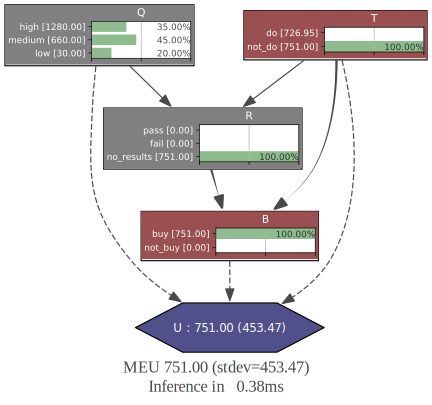

In [8]:
gnb.showInference(influence_diagram,engine=inference_engine,size="6!")

In [11]:
print(inference_engine.optimalDecision(B))


      ||  B                |
R     ||buy      |not_buy  |
------||---------|---------|
pass  || 1.0000  | 0.0000  |
fail  || 1.0000  | 0.0000  |
no_res|| 1.0000  | 0.0000  |



In [13]:
inference_engine.optimalDecision("B").argmax()

([{'B': 0, 'R': 0}, {'B': 0, 'R': 1}, {'B': 0, 'R': 2}], 1.0)

In [14]:
inference_engine.optimalDecision("T").argmax()

([{'T': 1}], 1.0)

In [22]:
influence_diagram.isDecisionNode(2)

True

In [23]:
influence_diagram.variable(2).name()

'T'